<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/praktikum7mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [12]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum7"

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
df = pd.read_csv(path + '/data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [16]:
print("\n=== INFO DATA ===")
print(df.info())

print("\n=== DESKRIPSI DATA ===")
print(df.describe(include="all"))


=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    floa

In [17]:
# Ambil hanya kolom numerik
num_df = df.select_dtypes(include=[np.number]).copy()

# Isi missing values dengan median
num_df = num_df.fillna(num_df.median(numeric_only=True))


In [18]:
# Target = kolom numerik terakhir → sesuai datasetmu: beta0_vh
y_col = num_df.columns[-1]
X_cols = list(num_df.columns[:-1])

corr = num_df.corr(numeric_only=True)

# Pilih fitur terbaik untuk regresi sederhana
best_x = corr[y_col].drop(labels=[y_col]).abs().idxmax()

print("\nTarget (Y):", y_col)
print("Fitur terbaik (Simple Regression):", best_x)


Target (Y): beta0_vh
Fitur terbaik (Simple Regression): iafe


In [19]:
X = num_df[[best_x]]
y = num_df[y_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nKoefisien:", model.coef_[0])
print("Intercept:", model.intercept_)


Koefisien: 0.001388169414878662
Intercept: 0.02273340337039989


In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== EVALUASI SIMPLE LINEAR REGRESSION ===")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== EVALUASI SIMPLE LINEAR REGRESSION ===
MAE : 0.008487113089745197
MSE : 0.00013767593249690378
RMSE: 0.011733538788315475
R²  : 0.7812617954652792


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


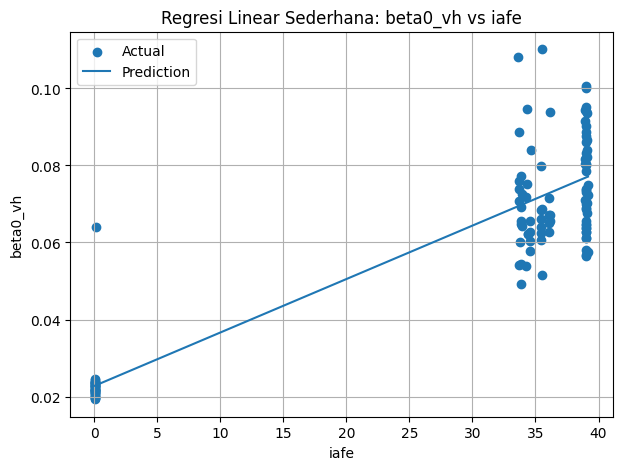

In [21]:

plt.figure(figsize=(7,5))
plt.scatter(X_test[best_x], y_test, label="Actual")
x_line = np.linspace(X_test[best_x].min(), X_test[best_x].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Prediction")
plt.xlabel(best_x)
plt.ylabel(y_col)
plt.title(f"Regresi Linear Sederhana: {y_col} vs {best_x}")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
top2 = corr[y_col].drop(labels=[y_col]).abs().sort_values(ascending=False).index[:2]

print("\nFitur Multiple Regression:", list(top2))

X_multi = num_df[list(top2)]
y_multi = num_df[y_col]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Tambahkan konstanta untuk OLS
X_train_m_const = sm.add_constant(X_train_m)
ols_model = sm.OLS(y_train_m, X_train_m_const).fit()

print("\n=== HASIL OLS MULTIPLE REGRESSION ===")
print(ols_model.summary())


Fitur Multiple Regression: ['iafe', 'b9']

=== HASIL OLS MULTIPLE REGRESSION ===
                            OLS Regression Results                            
Dep. Variable:               beta0_vh   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     724.1
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          1.50e-144
Time:                        15:30:29   Log-Likelihood:                 1432.4
No. Observations:                 475   AIC:                            -2859.
Df Residuals:                     472   BIC:                            -2846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [23]:
X_test_m_const = sm.add_constant(X_test_m)
y_pred_m = ols_model.predict(X_test_m_const)

mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = math.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("\n=== EVALUASI MULTIPLE REGRESSION ===")
print("MAE :", mae_m)
print("MSE :", mse_m)
print("RMSE:", rmse_m)
print("R²  :", r2_m)


=== EVALUASI MULTIPLE REGRESSION ===
MAE : 0.008638074171747338
MSE : 0.00013243885818797792
RMSE: 0.011508208296167477
R²  : 0.7920284589869528


In [24]:
pred_table = X_test_m.copy()
pred_table["y_actual"] = y_test_m
pred_table["y_pred"] = y_pred_m
pred_table["error"] = pred_table["y_pred"] - pred_table["y_actual"]

print("\n=== TABEL PREDIKSI MULTIPLE REGRESSION ===")
print(pred_table.head(20))


=== TABEL PREDIKSI MULTIPLE REGRESSION ===
         iafe        b9  y_actual    y_pred     error
30   35.50120   0.57920   0.06878  0.071588  0.002808
299  39.02545   0.45550   0.08715  0.076692 -0.010458
177  33.69036   1.57940   0.09674  0.069038 -0.027702
204  33.71030   1.57940   0.08862  0.069067 -0.019553
354  39.07763   0.44680   0.07118  0.076767  0.005587
265  39.01746   0.41330   0.06850  0.076677  0.008177
464   0.09080  39.57083   0.02320  0.023266  0.000066
551   0.06890  41.01168   0.02050  0.023347  0.002847
55   36.15273   0.35900   0.06554  0.072516  0.006976
196  33.69485   1.57940   0.08295  0.069045 -0.013905
137  34.60149   0.65420   0.06705  0.070288  0.003238
29   35.49403   0.49700   0.05203  0.071571  0.019541
353  39.08262   0.44170   0.07203  0.076774  0.004744
368  39.05929   0.33400   0.08139  0.076731 -0.004659
101  34.27733   0.46550   0.07169  0.069803 -0.001887
320  38.96703   0.35350   0.05308  0.076599  0.023519
502   0.06090  41.17330   0.02460  0.0